In this notebook, we simulate the interest rate paths using the exponential OU process. 

In [1]:
import numpy as np
import pandas as pd


# SOURCE: https://github.com/qnity/vasicek_one_factor_python
def simulate_Vasicek_One_Factor(r0: float = 0.1, a: float = 1.0, lam: float = 0.1, sigma: float = 0.2, T: int = 52, dt = 0.1) -> pd.DataFrame:
    # SIMULATE_VASICEK_ONE_FACTOR simulates a temporal series of interest rates using the One Factor Vasicek model
    # interest_rate_simulation = simulate_Vasicek_One_Factor(r0, a, lam, sigma, T, dt)
    #
    # Arguments:
    #   r0    = float, starting interest rate of the vasicek process 
    #   a     = float, speed of reversion" parameter that characterizes the velocity at which such trajectories will regroup around b in time
    #   lam   = float, long term mean level that all future trajectories will evolve around  
    #   sigma = float, instantaneous volatility measures instant by instant the amplitude of randomness entering the system
    #   T     = integer, end modelling time. From 0 to T the time series runs. 
    #   dt    = float, increment of time that the proces runs on. Ex. dt = 0.1 then the time series is 0, 0.1, 0.2,...
    #
    # Returns:
    #   interest_rate_simulation = N x 2 pandas DataFrame where index is modeling time and values are a realisation of the uderlying's price
    #
    # Example:
    #   Model the interest rate which is 10% today. The annualized instant volatility is 20%. The external analysis points out that the mean reversion parameter is 1 and the long term interest rate level is 10 % therefore the mean reversion correction is theta = 10% * 1 = 10%. The user is interested in an interest rate projection of the next 10 years in increments of 6 months (0.5 years)
    #
    #   import pandas as pd
    #   import numpy as np
    #
    #   simulate_Vasicek_One_Factor(0.1, 1.0, 0.1, 0.2, 10, 0.5)   
    #   [out] = Time    Stock Price                
    #           0.000000        0.100000
    #           0.526316        0.212055
    #           1.052632        0.115934
    #           1.578947        0.012870
    #           2.105263        0.003295
    #           2.631579        0.206635
    #           3.157895        0.191319
    #           3.684211        0.108299
    #           4.210526        0.094983
    #           4.736842        0.075903
    #           5.263158        0.229143
    #           5.789474       -0.111977
    #           6.315789        0.120245
    #           6.842105        0.116082
    #           7.368421        0.230879
    #           7.894737        0.266821
    #           8.421053        0.229788
    #           8.947368        0.304378
    #           9.473684        0.217760
    #           10.000000       0.217147
    # For more information see https://en.wikipedia.org/wiki/Vasicek_model
    
    N = int(T / dt) # number of subintervals of length 1/dt between 0 and max modeling time T

    time, delta_t = np.linspace(0, T, num = N, retstep = True)

    r = np.ones(N) * r0

    for t in range(1,N):
        r[t] = r[t-1] * np.exp(-a*dt)+lam*(1-np.exp(-a*dt))+sigma*np.sqrt((1-np.exp(-2*a*dt))/(2*a))* np.random.normal(loc = 0,scale = 1)

    dict = {'Time' : time, 'Interest Rate' : r}

    interest_rate_simulation = pd.DataFrame.from_dict(data = dict)
    interest_rate_simulation.set_index('Time', inplace = True)

    return interest_rate_simulation

In [18]:
# number of simulation
N = 2

# Monte Carlo Simulation
result = pd.DataFrame()
for i in range(N):
    one_sim = simulate_Vasicek_One_Factor()
    if i == 0:
        result = one_sim
    else:
        result['Interest Rate' + str(i+1)] = one_sim['Interest Rate']

In [19]:
# interest rate cannot be 0
result[result < 0] = 0

<AxesSubplot:xlabel='Time'>

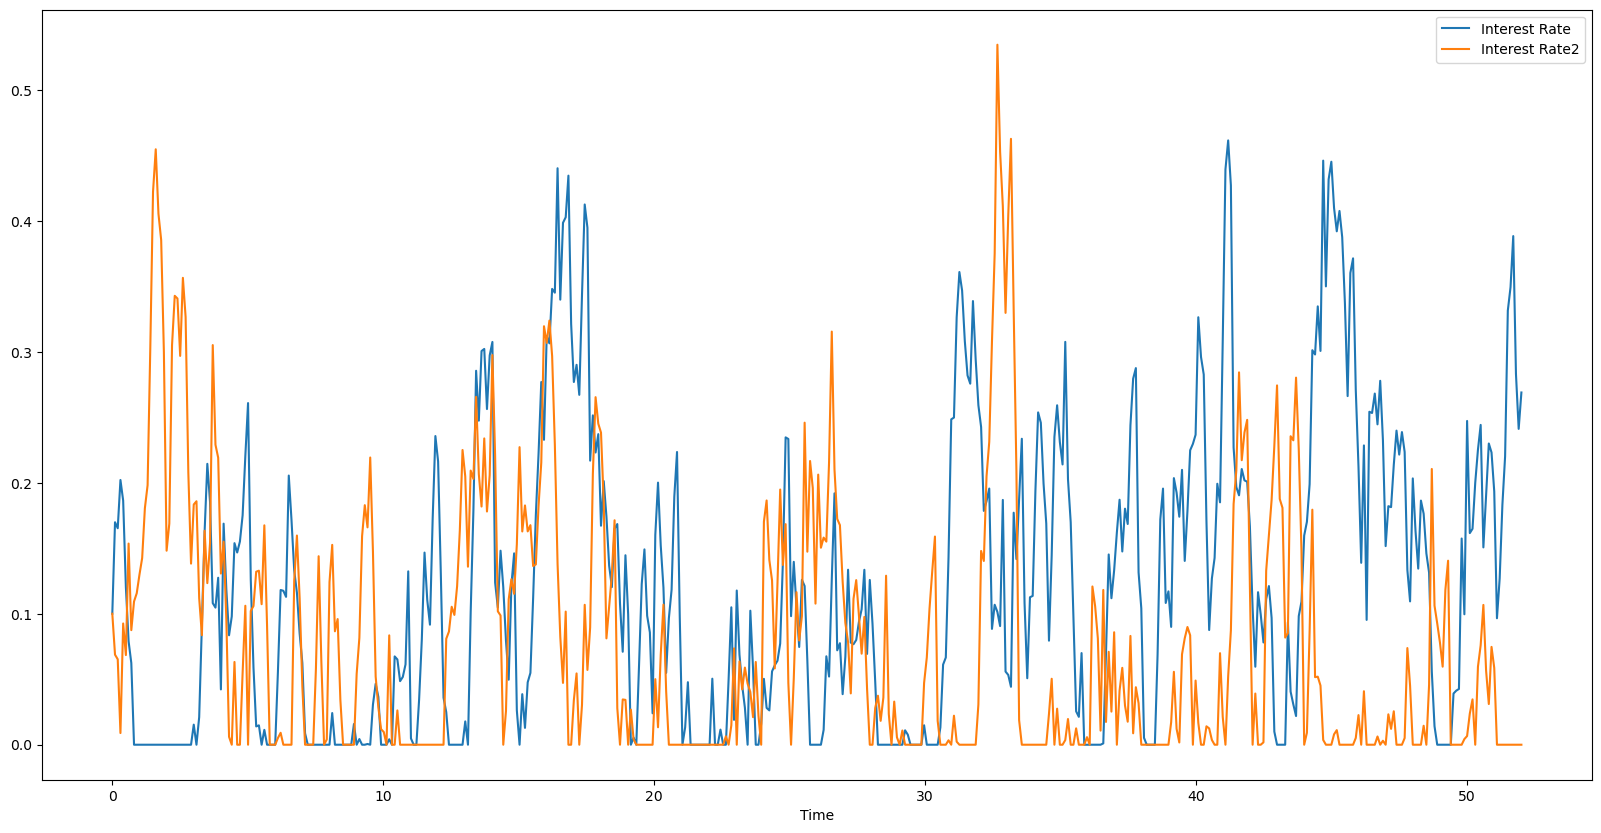

In [20]:
result.plot(figsize=(20,10))

In the above plot, we can see 2 paths of simulated interest rates for T = 52 (weeks). We set the speed of reversion to be 1 and the long term mean to be 0.1. The path behaves as expected. The interest rate exhibits a mean reverting behavior around r=0.1